In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

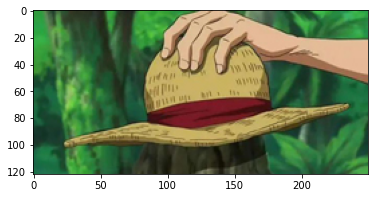

In [3]:
imgname = "lufy3.jpg"
img = plt.imread(imgname)
plt.imshow(img)

In [4]:
# 灰度化
def RGB2Gray(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    Gray = 0.3*R+0.59*G+0.11*B
    return Gray

In [5]:
# 二值化
def devide2two(img):
    x,y = img.shape
    dev = img.copy()
    for i in range(x):
        for j in range(y):
            if img[i][j]>128:
                dev[i][j] = 255
            else:
                dev[i][j] = 0
    return dev

In [6]:
# 抖动
def RandomDithering(img,dither):
    x,y = img.shape
    ret = img.copy()
    for i in range (x):
        for j in range(y):
            ran = random.randint(0,255)%(2*dither)-dither
            if ran+ret[i][j]>=128:
                ret[i][j] = 255
            else:
                ret[i][j] = 0
    return ret

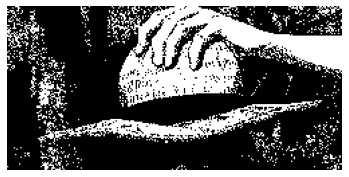

In [8]:
Gray = RGB2Gray(img)             # 灰度化
dith = RandomDithering(Gray,50)
plt.axis('off')
# plt.subplot(1,3,1)
# plt.imshow(img,cmap="gray")
# plt.subplot(1,3,2)
# plt.imshow(Gray,cmap="gray")
# plt.subplot(1,3,3)
plt.imshow(dith,cmap="gray")
plt.savefig('luffy.jpg')
plt.show()

In [182]:
# 写入文件
def Write_C(data):
    filename = imgname.split('.')[0]+".c"
    with open(filename,'w') as obj:
        obj.write("const unsigned char "+ imgname.split('.')[0] +"[] {\n"+ data +"};")
# 进制转换        
def sethex(summ):
    summ = int(summ)
    hexstr = hex(summ)
    if len(hexstr) == 3:
        restr = "0x0"+hexstr[2]
    else:
        restr = hexstr
    return restr+","

In [192]:
# 写出c文件
def OutPut_C(img):
    x,y = img.shape
    data = ''
    dith = img[::-1,:]
    dith[dith>128] = 1
    time=8
    summ = 0
    for i in range(y):
        for j in range(x):
            summ += dith[j][i]*(2**(time-1))
            time -=1
            if time == 0:
                data += sethex(summ)
                time = 8
                summ = 0
        data += sethex(summ)
        time = 7
        summ = 0
        data += '\n'
    Write_C(data)

In [193]:
OutPut_C(dith)